<a href="https://colab.research.google.com/github/CE605A/Anukul-Dwivedi_231030402/blob/main/CE605A_231030402_Prog_Asg1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

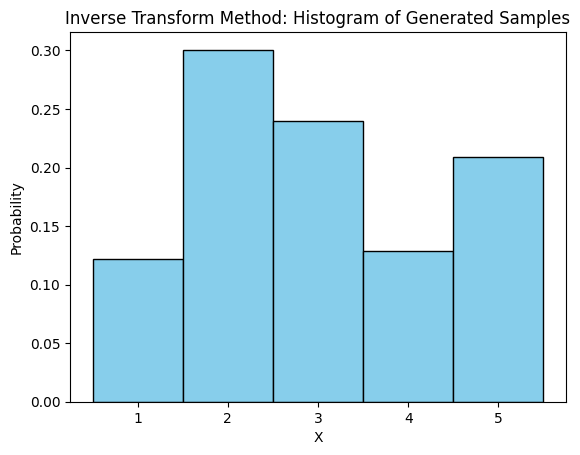

In [35]:
### PROGRAMMING ASSIGNMENT 1
### MONTE CARLO SIMULATION
### INVERSE TRANSFORM METHOD
import numpy as np
import matplotlib.pyplot as plt

### Part 1 :  Inverse CDF method to drive PMF for discrete variable

# Define the PMF of the discrete distribution
values = np.array([1, 2, 3, 4, 5, 6])
pmf = np.array([0.1, 0.3, 0.2, 0.1, 0.2, 0.1])

# Cumulative Distribution Function (CDF)
cdf = np.cumsum(pmf)

# Inverse Transform Method
def inverse_transform_sampling(cdf, values):
    u = np.random.rand()
    for i in range(len(cdf)):
        if u <= cdf[i]:
            return values[i]

# Number of samples to generate
sample_size = 500

# Generate random samples using the inverse transform method
samples = [inverse_transform_sampling(cdf, values) for _ in range(sample_size)]


# Plot a histogram of the generated samples
plt.hist(samples, bins=values - 0.5, align='mid',color='skyblue',edgecolor='black', density=True)
plt.title("Inverse Transform Method: Histogram of Generated Samples")
plt.xlabel("X")
plt.ylabel("Probability")
plt.show()


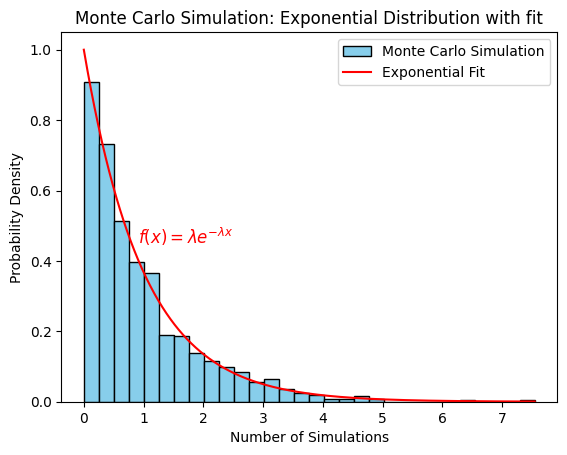

In [31]:

### Part 2 :  Inverse CDF method to drive pdf for continous variable


# Define the CDF of the standard exponential distribution
def exponential_pdf(x, lamda):
    return lamda * np.exp(-lamda * x)

# Inverse CDF method to sample from the standard exponential distribution
def inverse_cdf_exponential(lamda, size=1):
    u = np.random.rand(size)
    x = -np.log(1 - u) / lamda
    return x

# Parameters for the standard exponential distribution
lamda_exp = 1
sample_size_exp = 1000

# Generate random samples using the inverse CDF method for exponential distribution
samples_exp = inverse_cdf_exponential(lamda_exp, size=sample_size_exp)


# Plot a histogram of the generated samples
plt.hist(samples_exp, bins=30,color='skyblue',edgecolor='black',density=True,label='Monte Carlo Simulation')
x_values_exp = np.linspace(0, max(samples_exp), 1000)
plt.plot(x_values_exp, exponential_pdf(x_values_exp, lamda_exp), 'r-', label='Exponential Fit')


#Adding Equation of Exponential Curve
equation = r'$f(x) = \lambda e^{-\lambda x}$'
# Adjusting the text coordinates to move it closer to the curve
plt.text(0.9, 0.45, equation, fontsize=12, color='red')

plt.title("Monte Carlo Simulation: Exponential Distribution with fit")
plt.xlabel("Number of Simulations")
plt.ylabel("Probability Density")
plt.legend()
plt.show()


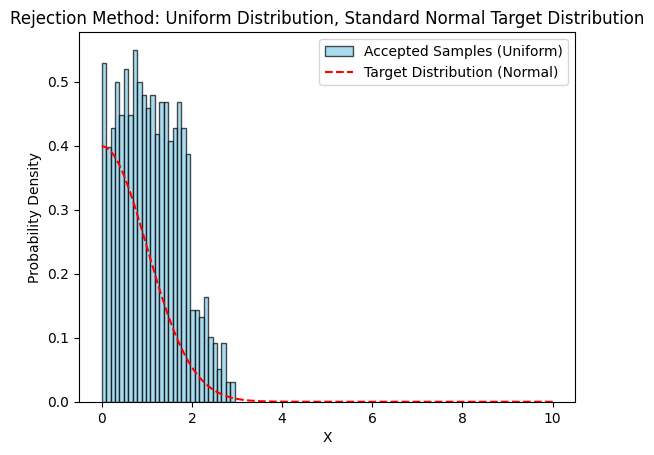

In [4]:
## REJECTION METHOD

## Part 3 : Rejection method  Sample of unifrom distribution and target distribution is standard distribution

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
# Define the target distribution (PDF) - Standard Normal Distribution
def target_distribution(x):
    return norm.pdf(x)
# Define the proposal distribution (uniform)
def proposal_distribution(x, lower_bound, upper_bound):
    return 1 / (upper_bound - lower_bound)
# Number of samples to generate
sample_size = 1000
# Define lower bound and upper bound of uniform distribution
lower_bound = 0
upper_bound = 10
# Rejection method to sample from the target distribution
samples = []
while len(samples) < sample_size:
  x = np.random.uniform(lower_bound, upper_bound)
  y = np.random.uniform(0, proposal_distribution(x, lower_bound, upper_bound))
  if y <= target_distribution(x):
        samples.append(x)

# Plot a histogram of the generated samples
plt.hist(samples, bins=30, density=True, color='skyblue', edgecolor='black', alpha=0.7, label='Accepted Samples (Uniform)')
x_values = np.linspace(lower_bound, upper_bound, 1000)
plt.plot(x_values, target_distribution(x_values), 'r--', label='Target Distribution (Normal)')
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.title('Rejection Method: Uniform Distribution, Standard Normal Target Distribution')
plt.legend()
plt.show()


In [6]:
# Bonus: Probability of having the disease given a positive test result

import numpy as np

# Define the parameters
sensitivity = 0.95  # Probability of a positive test result given the presence of the disease (P(Positive | Disease))
specificity = 0.90  # Probability of a negative test result given the absence of the disease (P(Negative | No Disease))
prevalence = 0.01   # Prevalence rate of the disease in the population (P(Disease))

# Number of simulations
num_simulations = 1000

# Bayes Theorem to calculate positive predicted value
positive_predicted_formula = (sensitivity * prevalence) / (sensitivity * prevalence + (1 - specificity) * (1 - prevalence))

# Simulation
simulated_results = np.random.rand(num_simulations) < prevalence
positive_results = np.random.rand(num_simulations) < sensitivity

# To calculate positive predicted value from the simulation
positive_predicted_simulation = np.sum(positive_results & simulated_results) / np.sum(positive_results)

# Print the results
print("Estimated probability that the person has the disease given a positive test result:", positive_predicted_formula)
print("Positive Predicted Value (Simulation):", positive_predicted_simulation)



Estimated probability that the person has the disease given a positive test result: 0.08755760368663597
Positive Predicted Value (Simulation): 0.011458333333333333
